In [3]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

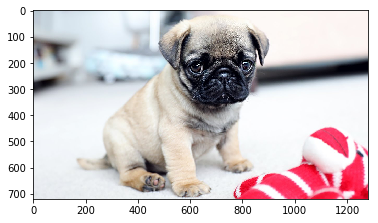

In [74]:
width = 299
height = 299
channels = 3

test_img = mpimg.imread(os.path.join("images", "cnn", "pug.jpg"))[:, :, :channels]

plt.imshow(test_img)


For the pretrained inception model, the values need to be between [-1, 1] so...

c:\users\yc\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """


(299, 299, 3)

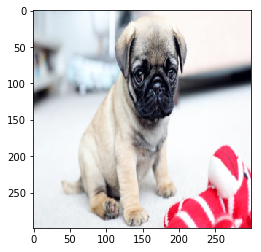

In [75]:
#test_img =  2 * test_img - 1
#Resize image as InceptionV3 uses 299 * 299
import scipy.misc as spy

test_img = spy.imresize(test_img, (299, 299, 3))

plt.imshow(test_img)
test_img.shape

In [77]:
import tarfile
import urllib

TF_MODELS_URL = "http://download.tensorflow.org/models"
INCEPTION_V3_URL = TF_MODELS_URL + "/inception_v3_2016_08_28.tar.gz"
INCEPTION_PATH = os.path.join("datasets", "inception")
INCEPTION_V3_CHECKPOINT_PATH = os.path.join(INCEPTION_PATH, "inception_v3.ckpt")

def download_progress(count, block_size, total_size):
    percent = count * block_size * 100 // total_size
    sys.stdout.write("\rDownloading: {}%".format(percent))
    sys.stdout.flush()


def fetch_pretrained_model(url=INCEPTION_V3_URL, path=INCEPTION_PATH):
    if os.path.exists(INCEPTION_V3_CHECKPOINT_PATH):    
        return    #if there exists a downloaded model just return
    
    os.makedirs(path, exist_ok=True)
    tgz_path = os.path.join(path, "inception_v3.tgz")
    urllib.request.urlretrieve(url, tgz_path)    #retrieve from tgz url to the local path folder
    inception_tgz = tarfile.open(tgz_path)    
    inception_tgz.extractall(path=path)
    inception_tgz.close()
    os.remove(tgz_path)

In [78]:
fetch_pretrained_model()

In [79]:
import re

CLASS_NAME_REGEX = re.compile(r"^n\d+\s+(.*)\s*$", re.M | re.U)

def load_class_names():
    with open(os.path.join("datasets", "inception", "imagenet_class_names.txt"), "rb") as f:
        content = f.read().decode("utf-8")
        return CLASS_NAME_REGEX.findall(content)

In [80]:
classes = ["background"] + load_class_names()
classes[:10]


['background',
 'tench, Tinca tinca\r',
 'goldfish, Carassius auratus\r',
 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias\r',
 'tiger shark, Galeocerdo cuvieri\r',
 'hammerhead, hammerhead shark\r',
 'electric ray, crampfish, numbfish, torpedo\r',
 'stingray\r',
 'cock\r',
 'hen\r']

In [81]:
from tensorflow.contrib.slim.nets import inception
import tensorflow.contrib.slim as slim

tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=[None, 299, 299, 3], name='X')

with slim.arg_scope(inception.inception_v3_arg_scope()):
    logits, end_points = inception.inception_v3(X, num_classes=1001, is_training=False)
    
predictions = end_points["Predictions"]
saver = tf.train.Saver()


In [82]:
X_test = test_img.reshape(-1, height, width, channels)

with tf.Session() as sess:
    saver.restore(sess, INCEPTION_V3_CHECKPOINT_PATH)
    prediction = predictions.eval(feed_dict={X:X_test})
    
classes[np.argmax(prediction[0])]

INFO:tensorflow:Restoring parameters from datasets\inception\inception_v3.ckpt


'flatworm, platyhelminth\r'